# Create a metamodel using Kriging

In this basic example we are going to create an approximation of a model response using a kriging model. We consider a bidimensional function with gaussian inputs. Then we create a kriging metamodel with a constant basis and a `SquaredExponential` covariance. 

We consider the function 
$$
g(X) = \cos(X_1 + X_2)
$$

for any $\mathbf{X}\in\mathbb{R}^2$. 
We assume that $X_1$ and $X_2$ have a gaussian distribution :
$$
X_1 \sim \mathcal{N}(0,1) \textrm{ and } X_2 \sim \mathcal{N}(0,1).
$$

In [1]:
from __future__ import print_function
import openturns as ot

We define the model. 

In [2]:
dimension = 2
input_names = ['x1', 'x2']
formulas = ['cos(x1 + x2)']
model = ot.SymbolicFunction(input_names, formulas)

We generate a simple Monte-Carlo input sample and evaluate the corresponding output sample.

In [3]:
distribution = ot.Normal(dimension)
samplesize = 15
x  = distribution.getSample(samplesize)
y = model(x)

Then we create a kriging metamodel, using a constant trend and a squared exponential covariance model. 

In [4]:
basis = ot.ConstantBasisFactory(dimension).build()
covarianceModel = ot.SquaredExponential([0.1]*dimension, [1.0])
algo = ot.KrigingAlgorithm(x, y, covarianceModel, basis)
algo.run()
result = algo.getResult()
metamodel = result.getMetaModel()

It is not so easy to visualize a bidimensional function. In order to simplify the graphics, we consider the value of the function at the input $x_{1,ref}=0.5$. This amounts to create a `ParametricFunction` where the first variable $x_1$ (at input index 0) is set to $0.5$.

In [5]:
x1ref = 0.5
metamodelAtXref = ot.ParametricFunction(metamodel, [0], [x1ref])
modelAtXref = ot.ParametricFunction(model, [0], [x1ref])

For this given value of $x_1$, we plot the model and the metamodel with $x_2$ from its 1% up to its 99% quantile. We configure the X title to "X2" because the default setting would state that this axis is the first value of the parametric function, which default name is "X0".

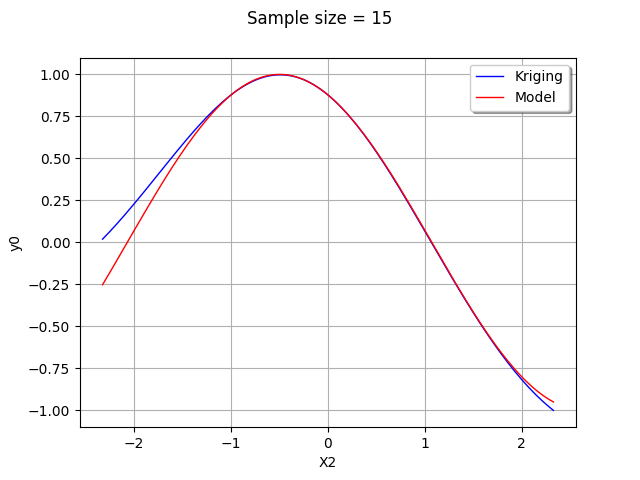

In [6]:
x2min = ot.Normal().computeQuantile(0.01)[0]
x2max = ot.Normal().computeQuantile(0.99)[0]
graph = metamodelAtXref.draw(x2min, x2max)
graph.setLegends(["Kriging"])
curve = modelAtXref.draw(x2min, x2max)
curve.setLegends(["Model"])
curve.setColors(['red'])
graph.add(curve)
graph.setLegendPosition("topright")
graph.setTitle("Sample size = %d" % (samplesize))
graph.setXTitle("X2")
graph

As we can see, the metamodel is quite accurate in this case. The metamodel is very close to the model in the center of the domain, where the density of the input distribution is highest.